Tüm derin sinir ağlarının içerdiği bazı temeller vardır:
- Bir giriş katmanı
- Bazı gizli katmanlar
- Bir çıktı katmanı

Geri kalanın çoğu, modeli oluşturan veri analistine kalmış.

Sınıflandırma, bazı girdiler verilen bir sınıf etiketinin çıktısını almayı içeren tahmine dayalı bir modelleme problemidir.

Aşağıdakiler, sınıflandırma sinir ağlarınızda sıklıkla kullanacağınız bazı standart değerlerdir.

| **Hyperparameter** | **İkili Sınıflandırma** | **Çoklu Sınıflandırma** |
| --- | --- | --- |
| Input layer shape | Özellik sayısı ile aynı (örn; yaş için 5, cinsiyet, kilo, boy, sigara içenlerin kalp krizi riski) | İkili sınıflandırma ile aynı |
| Gizli katman | Probleme özel, minimum = 1, maksimum = sınırsız | İkili sınıflandırma ile aynı |
| Gizli katman başına nöron sayısı | Probleme özel, genellikle 10 ila 100 | İkili sınıflandırma ile aynı |
| Çıktı katmanı şekli | 1 (bir sınıf veya diğer) | Sınıf başına 1 adet (örneğin yemek, kişi veya köpek fotoğrafı için 3) |
| Gizli aktivasyon | Genelde [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)  | İkili sınıflandırma ile aynı |
| Çıkış aktivasyonu | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| kayıp fonksiyonu | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimize Edici | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | İkili sınıflandırma ile aynı |

## Veri Oluşturma

Bir sınıflandırma veri setini içe aktararak başlayabiliriz, ancak hadi kendi sınıflandırma verilerimizden oluşturmaya çalışalım.

Scikit-Learn'ün `make_circles()` işlevini veriseti oluşturmak için kullanalım.

In [1]:
from sklearn.datasets import make_circles
import tensorflow as tf

# 1000 örnek
n_samples = 1000

# verisetini oluşturma
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

Verisetini oluşturuk gibi. Şimdi X ve y değerlerini kontrol edelim.

In [2]:
# özelliklere göz atalım (x1, x2)
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# ilk 10'nun etiketi
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Tamam, bazı verilerimizi ve etiketlerimizi gördük, görselleştirmeye geçmeye ne dersiniz?

> 🔑 Not: Herhangi bir tür makine öğrenimi projesi başlatmanın önemli bir adımı, verilerle bir olmaktır. Bunu yapmanın en iyi yollarından biri, üzerinde çalıştığınız verileri mümkün olduğunca görselleştirmektir.Slognamızı unutmayalım: "görselleştir, görselleştir, görselleştir".

Bir DataFrame yaratma ile başlayalım.

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [5]:
# etiketimize göre veri sayılarımız
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

Pekala, bir ikili (binary) sınıflandırma problemiyle uğraşıyoruz gibi görünüyor. İkilidir çünkü yalnızca iki etiket vardır (0 veya 1).

Daha fazla etiket seçeneği olsaydı (ör. 0, 1, 2, 3 veya 4), çok sınıflı (multi-label) sınıflandırma olarak adlandırılırdı.

Görselleştirmemizi bir adım daha ileri götürelim ve verilerimizi çizelim.

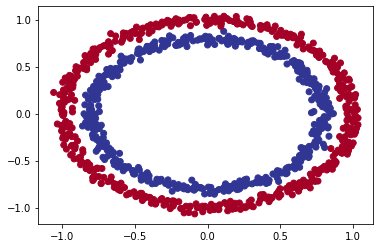

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Maviyi kırmızı noktalardan ayırt edebilen bir model yaratalım.

## Girdi (Input) ve Çıkış (Output) Şekilleri

Sinir ağları oluştururken karşılaşacağınız en yaygın sorunlardan biri şekil uyumsuzluklarıdır.

Daha spesifik olarak, girdi verilerinin şekli ve çıktı verilerinin şekli.

Bizim durumumuzda, X'i girmek ve modelimizin y'yi tahmin etmesini sağlamak istiyoruz.

Şimdi X ve y'nin şekillerini kontrol edelim.


In [7]:
# Özelliklerimizin ve etiketlerimizin şekillerini kontrol edelim
X.shape, y.shape

((1000, 2), (1000,))

Hmm, bu rakamlar nereden geliyor?

In [8]:
# Kaç örneğimiz olduğunu kontrol edelim
len(X), len(y)

(1000, 1000)

Yani y değeri kadar X değerimiz var, bu mantıklı.

Her birinin bir örneğini inceleyelim.

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Bir y değeri sonucunu veren iki X özelliğimiz var.

Bu, sinir ağımızın girdi şeklinin en az bir boyutu iki olan bir tensörü kabul etmesi ve en az bir değere sahip bir tensör çıkışı vermesi gerektiği anlamına gelir.

> 🤔 Not: (1000,) şeklinde bir y olması kafa karıştırıcı görünebilir. Ancak bunun nedeni, tüm y değerlerinin aslında skaler (tek değerler) olması ve bu nedenle bir boyutu olmamasıdır. Şimdilik, çıktı şeklinizin en azından bir y örneğiyle aynı değerde olduğunu düşünün (bizim durumumuzda, sinir ağımızın çıktısı en az bir değer olmalıdır).

## Modellemedeki adımlar

Artık elimizde hangi verilere ve girdi ve çıktı şekillerine sahip olduğumuzu biliyoruz, onu modellemek için nasıl bir sinir ağı kuracağımıza bakalım.

TensorFlow'da bir model oluşturmak ve eğitmek için tipik olarak 3 temel adım vardır.

- **Bir model oluşturma**<br>
Bir sinir ağının katmanlarını kendiniz bir araya getirin (işlevsel veya sıralı API'yi kullanarak) veya önceden oluşturulmuş bir modeli içe aktarın (aktarım öğrenimi (transfer learning) olarak bilinir).
- **Bir model derleme**<br>
Bir modelin performansının nasıl ölçüleceğini (kayıp/metrikler) tanımlamanın yanı sıra nasıl iyileştirileceğini (optimizer) tanımlama.
- **Modeli fit etme**<br>
Modelin verilerdeki kalıpları bulmaya çalışmasına izin vermek (X, y'ye nasıl ulaşır).

Sıralı API'yi kullanarak bunları çalışırken görelim. Ve sonra her birinin üzerinden geçeceğiz.

In [10]:
tf.random.set_seed(42)

# 1. Sıralı API'yi kullanarak modeli oluşturma
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Modeli derleme
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Modeli fit etme
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


Accuracy metriğine bakıldığında, modelimiz zayıf bir performans sergiliyor (ikili sınıflandırma probleminde %50 doğruluk, tahmin etmeye eşdeğerdir), ama ya onu daha uzun süre eğitirsek?

In [11]:
# Modelimizi daha uzun süre eğitme
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Verilerin 200 geçişinden sonra bile, hala tahmin ediyormuş gibi performans gösteriyor.

Fazladan bir katman ekleyip biraz daha uzun süre eğitsek ne olur?

In [12]:
tf.random.set_seed(42)

# 1. Sıralı API'yi kullanarak modeli oluşturma
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # ek olarak bir katman ekleme
  tf.keras.layers.Dense(1)
])

# Modeli derleme
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Modeli fit etme
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# modeli değerlendirme
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Bir Modeli Geliştirmek

Modelimizi geliştirmek için daha önce geçtiğimiz 3 adımın neredeyse her bölümünü değiştirebiliriz.

- **Bir model oluşturma** <br>
Burada daha fazla katman eklemek, her katmandaki gizli birimlerin (nöronlar olarak da adlandırılır) sayısını artırmak, her katmanın etkinleştirme işlevlerini değiştirmek isteyebilirsiniz.
- **Bir model derleme** <br>
Farklı bir optimizasyon işlevi (genellikle birçok sorun için oldukça iyi olan Adam optimize edici gibi) seçmek veya belki de optimizasyon işlevinin öğrenme oranını değiştirmek isteyebilirsiniz.
- **Bir modeli fit etme** <br>
Belki de bir modeli daha fazla epoch'a sığdırabilirsiniz (onu daha uzun süre eğitmeye bırakın).

Daha fazla nöron, fazladan bir katman ve Adam optimize edici eklemeye ne dersiniz?

Elbette bunu yapmak tahmin etmekten daha iyidir...

In [14]:
tf.random.set_seed(42)

# 1. Sıralı API'yi kullanarak modeli oluşturma
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 yoğun nöron ekleyin
  tf.keras.layers.Dense(10), # 10 nöronlu başka bir katman ekleyin
  tf.keras.layers.Dense(1)
])

# Modeli derleme
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Modeli fit etme
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
#  Modeli değerlendirme
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

Birkaç numara çıkardık ama modelimiz tahmin etmekten bile daha iyi değil.

Neler olduğunu görmek için bazı görselleştirmeler yapalım.

> 🔑 Not: Modeliniz garip bir şekilde performans gösterdiğinde veya verilerinizle ilgili tam olarak emin olmadığınız bir şeyler olduğunda, şu üç kelimeyi hatırlayın: görselleştir, görselleştir, görselleştir. Verilerinizi inceleyin, modelinizi inceleyin, modelinizin tahminlerini inceleyin.

Modelimizin tahminlerini görselleştirmek için bir `plot_decision_boundary()` fonksiyonu oluşturacağız ve bu fonksiyon:

Eğitilmiş bir modeli, özellikleri (X) ve etiketleri (y) alır.
- Farklı X değerlerinden oluşan bir ağ ızgarası oluşturur.
- [Meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) üzerinden tahminler yapar.
- Tahminleri ve farklı bölgeler (her benzersiz sınıfın düştüğü yer) arasında bir çizgi çizer.

> 🔑 Not: Bir işlevin ne yaptığından emin değilseniz, ne yaptığını görmek için onu çözmeyi ve satır satır yazmayı deneyin. Küçük parçalara ayırın ve her bir parçanın çıktısını görün.

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Çizimin eksen sınırlarını tanımlayın ve bir ağ ızgarası oluşturun
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # x değerlerini yaratın
  x_in = np.c_[xx.ravel(), yy.ravel()] 
  
  # Eğitilmiş modeli kullanarak tahminler yapın
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


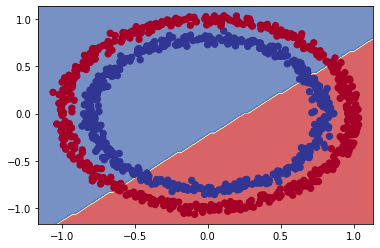

In [17]:
# Modelimizin yaptığı tahminlere göz atalım
plot_decision_boundary(model_3, X, y)

Görünüşe göre modelimiz veriler arasında düz bir çizgi çizmeye çalışıyor. 

Düz çizgi çizmeye çalışmasının hatası ne? <br>
Ana sorun, verilerimizin düz bir çizgiyle ayrılamamasıdır. Eğer verilerimiz bir regresyon tanımlasaydı modelimiz doğru bir yöntem uygulamış olacaktı. Hadi deneyelim

In [18]:
tf.random.set_seed(42)

# regresyon verisi yaratma
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Eğitim ve test setlerine ayırma
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# modeli yeni veriyle ffit etme
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Hata almak mı? Fark ettiniz değil mi? Modelimiz sınıflandırma için eğitilmiş bir model. Şimdi o modeli regresyon için eğitelim.

In [19]:
tf.random.set_seed(42)

# Modeli yeniden oluşturma
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# derlenmiş modelimizin kaybını ve ölçümlerini değiştirme
model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) 

# modeli fit etme
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

Tamam, modelimiz bir şeyler öğreniyor gibi görünüyor (mae değeri her epoch'ta aşağı doğru eğilim gösteriyor), hadi tahminlerini çizelim.

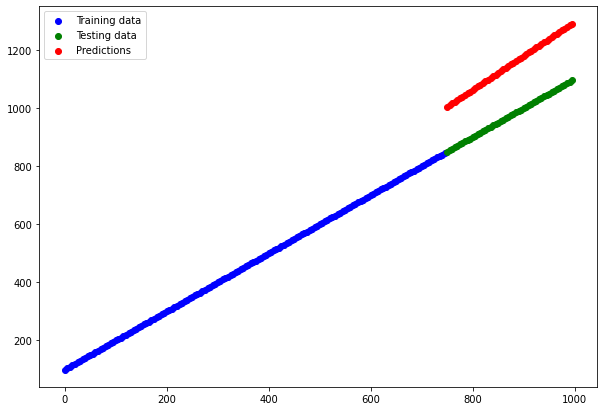

In [20]:
# Eğitimli modelimiz ile tahminler yapma
y_reg_preds = model_3.predict(y_reg_test)

# Modelin tahminlerini regresyon verilerimize göre çizme
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Tahminler mükemmel olmamakla birlikte fena da sayılmaz. Yani bu, modelimizin bir şeyler öğreniyor olması gerektiği anlamına geliyor. Sınıflandırma problemimiz için gözden kaçırdığımız bir şey olmalı.

## Doğrusal Olmama (Non-linearity)

Tamam, sinir ağımızın düz çizgileri modelleyebildiğini gördük. Düz olmayan (doğrusal olmayan) çizgiler ne olacak?

Sınıflandırma verilerimizi (kırmızı ve mavi daireleri) modelleyeceksek, bazı doğrusal olmayan çizgilere ihtiyacımız olacak.

In [21]:
tf.random.set_seed(42)

# bir model yaratma
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 lineer aktivasyonlu gizli katman
  tf.keras.layers.Dense(1) # çıktı katmanı
])

# modeli derleme
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# modeli fit etme
history = model_5.fit(X, y, epochs=100, verbose=0)

Model çıktısına ayrıntılı olarak bakarsanız modelin hala öğrenmediğini göreceksiniz. Nöron ve katmanların sayısını artırırsak sizce öğrenmesini sağlayabilir miyiz?

In [22]:
tf.random.set_seed(42)

# bir model yaratma
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # gizli katmanı 1, 4 nöronlu bir relu aktivasyonu
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # gizli katmanı 2, 4 nöronlu bir relu aktivasyonu
  tf.keras.layers.Dense(1) # çıktı katmanı
])

# modeli derleme
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# modeli fit etme
history = model_6.fit(X, y, epochs=100, verbose=0)

In [23]:
# modeli değerlendirme
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

%50 doğruluğa ulaşıyoruz, modelimiz hala berbat sonuçlar veriyor.

Tahminler nasıl görünüyor?

doing binary classifcation...


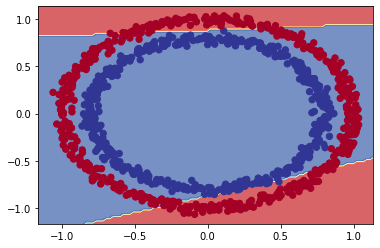

In [24]:
# 2 gizli katman kullanarak tahminlere göz atın
plot_decision_boundary(model_6, X, y)

İdeal olarak, sarı çizgiler kırmızı dairenin ve mavi dairenin iç kısmına gider.

Tamam, hadi bu daireyi bir kereliğine modelleyelim.

Bir model daha (söz veriyorum... aslında, bu sözü bozmak zorunda kalacağım... daha birçok model üreteceğiz).

Bu sefer çıktı katmanımızdaki aktivasyon fonksiyonunu da değiştireceğiz. Bir sınıflandırma modelinin mimarisini hatırlıyor musunuz? İkili sınıflandırma için, çıktı katmanı aktivasyonu genellikle Sigmoid aktivasyon fonksiyonudur.

In [25]:
tf.random.set_seed(42)

# modeli yaratma
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
  ])

# modeli derleme
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# modeli fit etme
history = model_7.fit(X, y, epochs=100, verbose=0)

In [26]:
# modeli değerlendirme
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Süper. Modelimiz harika bir accuracy değeri verdi. Görselleştirip nasıl göründüğüne bakalım hemen.

doing binary classifcation...


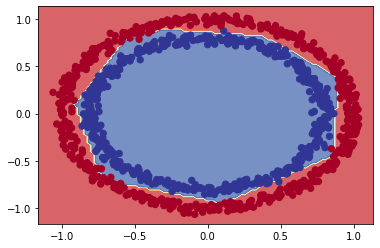

In [27]:
plot_decision_boundary(model_7, X, y)

Yapmak istediğimiz sınıflandırma işlemi gerçekleşmiş. Mavi ve kırmızıyı ayırmayı başardık. 

> 🤔 Soru: Yaptığımız tahminlerde yanlış olan ne? Burada modelimizi gerçekten doğru değerlendiriyor muyuz? İpucu: Model hangi verileri öğrendi ve biz neyi tahmin ettik?

Buna cevap vermeden önce, az önce ele aldığımız şeyin farkına varmak önemlidir.

> 🔑 Not: Doğrusal (düz çizgiler) ve doğrusal olmayan (düz olmayan çizgiler) işlevlerin birleşimi, sinir ağlarının temel temellerinden biridir.

Bunu şöyle düşünün:

Size sınırsız sayıda düz çizgi ve düz olmayan çizgi vermiş olsaydım, ne tür desenler çizebilirdiniz? Esasen sinir ağlarının verilerdeki kalıpları bulmak için yaptığı şey budur.

Kullandığımız aktivasyon fonksiyonları sayesinde hedeflediğimiz modele ulaşdık. Şimdi fikir edinmek adına aktivasyon fonksiyonları oluşturup, oluşturduğumuz bu fonksiyonların sonuçlarını değerlendirelim.

In [28]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

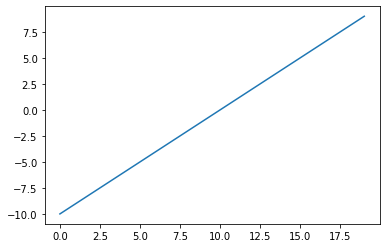

In [29]:
# Görselleştirelim
plt.plot(A);

Düz (doğrusal) bir çizgi! Güzel, şimdi sigmoid fonksiyonunu ile bu modeli yeniden oluşturalım ve verilerimize ne yaptığını görelim. 

In [30]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

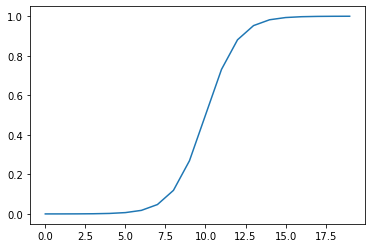

In [31]:
# sigmoid fonksiyona soktuğumuz değerlerin çıktısını görselleştirelim
plt.plot(sigmoid(A));

Düz olmayan (doğrusal olmayan) bir çizgi!

Tamam, ReLU işlevine ne dersiniz (ReLU tüm negatifleri 0'a çevirir ve pozitif sayılar aynı kalır)?

In [32]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

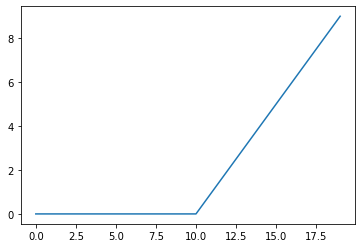

In [33]:
# relu fonksiyona soktuğumuz değerlerin çıktısını görselleştirelim
plt.plot(relu(A));

Düz olmayan bir çizgi daha!

Peki, TensorFlow'un lineer aktivasyon fonksiyonuna ne dersiniz?


In [34]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Girdiğimiz değerler olduğu gibi çıktı. Bunu kontrol edelim.

In [35]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Tamam, bu nedenle, modelin yalnızca doğrusal etkinleştirme fonksiyonlarını kullanırken gerçekten hiçbir şey öğrenmemesi mantıklıdır, çünkü doğrusal etkinleştirme işlevi, giriş verilerimizi hiçbir şekilde değiştirmez.

Doğrusal olmayan fonksiyonlarımızla verilerimiz manipüle edilir. Bir sinir ağı, girdileri ve çıktıları arasındaki desenleri çizmek için bu tür dönüşümleri büyük ölçekte kullanır.

Şimdi, sinir ağlarının derinlerine dalmak yerine, öğrendiklerimizi farklı problemlere uygulayarak kodlamaya devam edeceğiz, ancak sahne arkasında neler olup bittiğine daha derinlemesine bakmak istiyorsanız, aşağıdaki bölüme göz atabilirsiniz.

> 📖 Kaynak: Aktivasyon işlevleri hakkında daha fazla bilgi için, bunlarla ilgili [makine öğrenimi sayfasına ](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#)bakın.

## Sınıflandırma Modelimizin Değerlendirilmesi Ve İyileştirilmesi

Yukarıdaki soruya cevap verdiyseniz, yanlış yaptığımızı anlamış olabilirsiniz. Modelimizi, train ettiğimiz aynı veriler üzerinde değerlendiriyorduk.

Verilerimizi train, validation (isteğe bağlı) ve test kümelerine bölmek daha iyi bir yaklaşım olacaktır.

Bunu yaptıktan sonra, modelimizi train setinde eğiteceğiz (verilerdeki desenleri bulmasına izin verin) ve ardından test setindeki değerleri tahmin etmek için kullanarak modelleri ne kadar iyi öğrendiğini göreceğiz.

Hadi yapalım.

In [36]:
# Tüm veri setinde kaç örnek var?
len(X)

1000

In [37]:
# Verileri train ve test setlerine ayırın
X_train, y_train = X[:800], y[:800] 
X_test, y_test = X[800:], y[800:] 

# Verilerin şekillerini kontrol edin
X_train.shape, X_test.shape 

((800, 2), (200, 2))

Harika, şimdi train ve test setlerimiz var, hadi train verilerini modelleyelim ve modelimizin test setinde öğrendiklerini değerlendirelim.

In [38]:
tf.random.set_seed(42)

# model yaratma
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary output değeri aldığı için
])

# modeli derleme
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# modeli fit etme
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [39]:
# Modelimizi test setinde değerlendirelim
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Test setinde model kaybı (loss): {loss}")
print(f"Test setinde model doğruluğu (accuracy): {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Test setinde model kaybı (loss): 0.1246885135769844
Test setinde model doğruluğu (accuracy): 100.00%


%100 doğruluk? Güzel!

Şimdi model_8'i oluşturmaya başladığımızda model_7 ile aynı olacağını söylemiştik ama bunu biraz yalan bulmuş olabilirsiniz.

Çünkü birkaç şeyi değiştirdik:

- **Aktivasyon parametresi**<br>
TensorFlow'da kitaplık yolları (tf.keras.activations.relu) yerine dizeler ("relu" & "sigmoid") kullandık, ikisi de aynı işlevselliği sunar.
- **Learning_rate (ayrıca lr) parametresi**<br> 
Adam optimizer'deki öğrenme oranı parametresini 0,001 yerine 0,01'e yükselttik (10x artış).
  - Öğrenme oranını, bir modelin ne kadar hızlı öğrendiği olarak düşünebilirsiniz. Öğrenme oranı ne kadar yüksek olursa, modelin öğrenme kapasitesi o kadar hızlı olur, ancak, bir modelin çok hızlı öğrenmeye çalıştığı ve hiçbir şey öğrenmediği, çok yüksek bir öğrenme oranı gibi bir şey vardır. (overfitting ve underfitting kavramları)
- **Epoch sayısı**<br>
Epoch sayısını (epochs parametresini kullanarak) 100'den 25'e düşürdük, ancak modelimiz hem eğitim hem de test setlerinde hala inanılmaz bir sonuç aldı.
  - Modelimizin eskisinden bile daha az epoch sayısı ile iyi performans göstermesinin nedenlerinden biri (tek bir epoch, modelin verideki kalıpları bir kez bakarak öğrenmeye çalışması olduğunu unutmayın, bu nedenle 25 epoch, modelin 25 şansı olduğu anlamına gelir) öncekinden daha fazla öğrenme oranı.

Modelimizin değerlendirme ölçütlerine göre iyi performans gösterdiğini biliyoruz ancak görsel olarak nasıl performans gösterdiğini görelim.

doing binary classifcation...
doing binary classifcation...


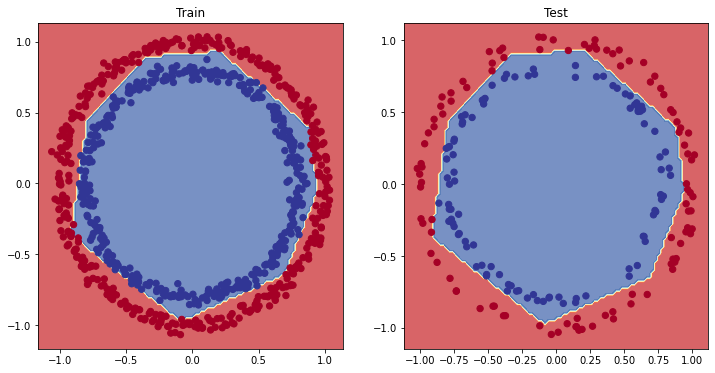

In [40]:
# Eğitim ve test setleri için karar sınırlarını çizin
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

İnce ayar (fine tuning) ile neredeyse mükemmel bir model eğittik.

## Kayıp (Loss) Eğrilerini Görselleştirin

Yukarıdaki grafiklere baktığımızda modelimizin çıktılarının çok iyi olduğunu görebiliriz. Ama modelimiz öğrenirken nasıl bir yol izledi?

Olduğu gibi, modelin verilere bakma şansı olduğu her seferinde (her epoch bir kez) performans nasıl değişti? Bunu anlamak için kayıp (loss) eğrilerini kontrol edebiliriz.Bir modelde fit() işlevini çağırırken değişken geçmişini kullandığımızı görmüş olabilirsiniz (fit() bir Geçmiş nesnesi döndürür).

Modelimizin öğrenirken nasıl performans gösterdiğine dair bilgileri buradan alacağız. Bakalım nasıl kullanacağız...

In [41]:
# history niteliğini kullanarak geçmiş değişkenindeki bilgilere erişebilirsiniz
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Çıktıları inceleyerek kayıp değerlerinin düştüğünü ve doğruluğun arttığını görebiliriz.

Nasıl görünüyor (görselleştirin, görselleştirin, görselleştirin)?


Text(0.5, 1.0, 'Model_8 training curves')

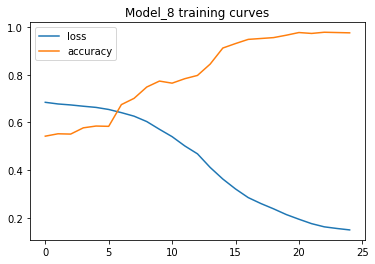

In [42]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

Güzel. Bu, bir sınıflandırma problemiyle uğraşırken aradığımız ideal görsellemedir, kayıp azalır, doğruluk artar.

> 🔑 Not: Birçok problem için, kayıp fonksiyonunun düşmesi, modelin iyileştiği anlamına gelir.

## En İyi Öğrenme Oranını (Learning Rate) Bulma

Mimarinin (katmanlar, nöronların sayısı, aktivasyonlar vb.) yanı sıra, sinir ağı modelleriniz için ayarlayabileceğiniz en önemli hiperparametre öğrenme oranıdır (lr). 

model_8'de Adam optimizer'ın öğrenme oranını varsayılan 0,001'den (varsayılan) 0,01'e indirdiğimizi gördünüz. Ve bunu neden yaptığımızı merak ediyor olabilirsiniz. Şanslı bir tahmindi.

Daha düşük bir öğrenme oranı denemeye ve modelin nasıl gittiğini görmeye karar verdim. Şimdi "Cidden mi? Bunu yapabilir misin?" diye düşünüyor olabilirsiniz. Ve cevap evet. Sinir ağlarınızın hiperparametrelerinden herhangi birini değiştirebilirsiniz. Pratik yaparak, ne tür hiperparametrelerin işe yarayıp nelerin yaramadığını görmeye başlayacaksınız.

Bu, genel olarak makine öğrenimi ve derin öğrenme hakkında anlaşılması gereken önemli bir şeydir. Bir model kuruyorsunuz ve onu değerlendiriyorsunuz, bir model kuruyorsunuz ve onu değerlendiriyorsunuz ... bu döngü en iyi veya ideal sonuca erişene dek devam ediyor.

Bununla birlikte, ileriye dönük modelleriniz için en uygun öğrenme oranını (en azından eğitime başlamak için) bulmanıza yardımcı olacak bir numara tanıtmak istiyorum. Bunu yapmak için aşağıdakileri kullanacağız:

- Bir [learning rate callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
  - Geri aramayı (backpropagation), eğitim sırasında modelinize ekleyebileceğiniz ekstra bir işlevsellik parçası olarak düşünebilirsiniz.
- Başka bir model (yukarıdakilerin aynısını kullanabiliriz, burada model oluşturma alıştırması yapıyoruz).
- Değiştirilmiş bir kayıp eğrileri grafiği

Her birinin üzerinden kodlarla geçeceğiz, sonra da neler olduğunu açıklayacağız.

> 🔑 Not: TensorFlow'daki birçok sinir ağı yapı taşının varsayılan hiperparametreleri, genellikle kutudan çıkar çıkmaz çalışacak şekilde kurulur (örneğin, Adam optimizer'ın varsayılan ayarları genellikle birçok veri kümesinde iyi sonuçlar alabilir). Bu nedenle, önce varsayılanları denemek ve ardından gerektiği gibi ayarlamak (fine tuning) iyi bir fikirdir.

In [43]:
tf.random.set_seed(42)

# bir model yaratalım (model_8'in aynısı)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# modeli derleyelim
model_9.compile(loss="binary_crossentropy", 
              optimizer="Adam", 
              metrics=["accuracy"]) 

# öğrenme oranını belli bir kurala göre azaltacak fonksiyonu ekleme
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 
# 1e-4'ten başlayarak her epochta 10**(epoch/20) artan bir dizi öğrenme oranı (learning rate)

# modeli fit etme
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

Modelimizin eğitimi bitti, şimdi eğitim grafiğine bir göz atalım.

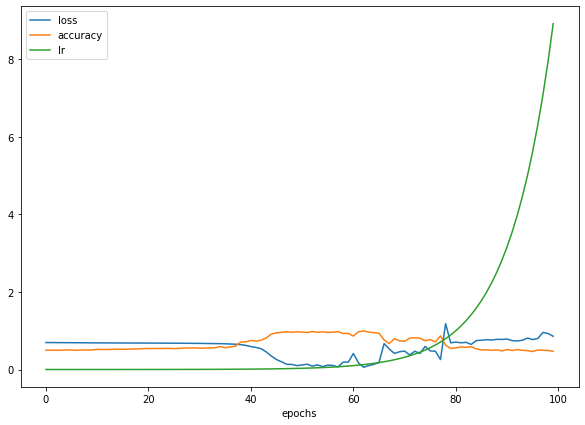

In [44]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Gördüğünüz gibi epoch sayısı arttıkça öğrenme oranı katlanarak artıyor. Ve öğrenme oranı yavaşça arttığında belirli bir noktada modelin doğruluğunun arttığını (ve kaybın azaldığını) görebilirsiniz.

Bu çarpma noktasının nerede olduğunu bulmak için, günlük ölçekli öğrenme oranına karşı kaybı çizebiliriz.


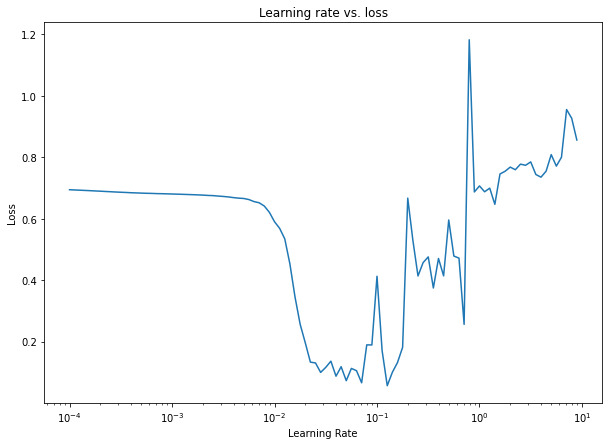

In [45]:
# Kayba karşı öğrenme oranını çizin
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

Öğrenme hızının ideal değerini bulmak için (en azından modelimizi eğitmeye başlamak için ideal değer), temel kural, kaybın hala azalmakta olduğu ancak tam olarak düzleşmediği eğriyi kullanmaktır. Bu durumda ideal öğrenme oranımız 0,01  ile 0,02 arasında olur.

Şimdi modelimiz için ideal öğrenme oranını (0,02 kullanacağız) tahmin ettik, hadi bu değerle yeniden eğitelim.

In [46]:
tf.random.set_seed(42)

# bir model yaratma
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# yeni lr değeri ile modeli derleme
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

Güzel! Biraz daha yüksek öğrenme oranıyla (0,01 yerine 0,02), daha az epoch (25 yerine 20) ile model_8'den daha yüksek bir doğruluğa ulaşıyoruz.

In [47]:
# Modeli test veri seti ile değerlendirin
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

Bakalım tahminler göreselleştirme üzerinde nasıl duruyor.

doing binary classifcation...
doing binary classifcation...


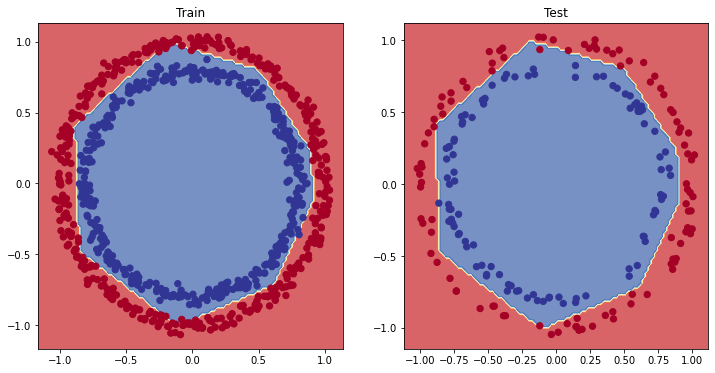

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

Ve gördüğümüz gibi, yine neredeyse mükemmel. Bunlar, kendi modellerinizi oluştururken sıklıkla gerçekleştireceğiniz deneylerdir. Varsayılan ayarlarla başlayın ve bunların verilerinizde nasıl performans gösterdiğini görün. Ve istediğiniz kadar iyi performans göstermiyorlarsa, geliştirin. Sınıflandırma modellerimizi değerlendirmenin birkaç yoluna daha bakalım.


## Daha Fazla Sınıflandırma Değerlendirme Yöntemi

Yaptığımız görselleştirmelerin yanı sıra, sınıflandırma modellerimizi değerlendirmek için kullanabileceğimiz bir dizi farklı değerlendirme ölçütü var.

| **Metrik adı/Değerlendirme yöntemi*** | **Tanım** | **Kod** |
| --- | --- | --- |
| Accuracy | Modeliniz 100 tahminden kaçı doğru çıkıyor? Örneğin. %95 doğruluk, 95/100 tahminlerin doğru olduğu anlamına gelir. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) veya [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Gerçek pozitiflerin toplam örnek sayısına oranı. Daha yüksek hassasiyet, daha az yanlış pozitife yol açar (model, 0 olması gerektiğinde 1'i tahmin eder). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) veya [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Gerçek pozitiflerin toplam gerçek pozitif ve yanlış negatif sayısı üzerindeki oranı (model, 1 olması gerektiğinde 0'ı tahmin eder). Daha yüksek hatırlama, daha az yanlış negatife yol açar. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Kesinlik ve geri çağırmayı tek bir metrikte birleştirir. 1 en iyisidir, 0 en kötüsüdür. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Tahmin edilen değerleri gerçek değerlerle tablo şeklinde karşılaştırır, %100 doğruysa matristeki tüm değerler sol üstten sağ alta olacaktır. | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Kesinlik, geri çağırma ve f1 puanı gibi bazı ana sınıflandırma ölçütlerinin toplanması. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |



> 🔑 Not: Her sınıflandırma problemi, farklı türde değerlendirme yöntemleri gerektirecektir. Ama en azından yukarıdakilere aşina olmalısınız.

Doğrulukla başlayalım.

Modelimizi derlerken metrics parametresine `["accuracy"]` ilettiğimiz için, üzerinde `evaluate()` öğesinin çağrılması, doğruluğun yanı sıra kaybı da döndürecektir.

In [49]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Test setinde model kaybı:: {loss}")
print(f"Test setinde model doğruluğu: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Test setinde model kaybı:: 0.05740184709429741
Test setinde model doğruluğu: 99.00%


In [50]:
from sklearn.metrics import confusion_matrix

# tahminler yapma
y_preds = model_10.predict(X_test)

# bir confusion matrix oluşturma
confusion_matrix(y_test, y_preds)

ValueError: ignored

Ahh, görünüşe göre tahminlerimiz olması gereken formatta değil. Onları kontrol edelim.


In [51]:
# İlk 10 tahmine göz atalım
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [52]:
# ilk 10 test etiketine göz atalım
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

Tahminlerimizi ikili formata (0 veya 1) almamız gerekiyor gibi görünüyor.

Ama merak ediyor olabilirsiniz, şu anda hangi formattalar?  Mevcut formatlarında (9.8526537e-01), tahmin olasılıkları adı verilen bir formdalar.

Bunu sinir ağlarının çıktılarında sıklıkla göreceksiniz. Genellikle kesin değerler olmayacaklar, ancak daha çok, şu veya bu değer olma olasılıklarının bir olasılığı olacaktır. Bu nedenle, bir sinir ağı ile tahminler yaptıktan sonra sıklıkla göreceğiniz adımlardan biri, tahmin olasılıklarını etiketlere dönüştürmektir. Bizim durumumuzda, temel doğruluk etiketlerimiz (y_test) ikili (0 veya 1) olduğundan, tf.round() kullanarak tahmin olasılıklarını ikili biçimlerine dönüştürebiliriz.


In [53]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

İşte şimdi oldu. confusion matrix uygulayabiliriz.

In [54]:
# bir confusion matrix oluşturma
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

Pekala, en yüksek sayıların sol üst ve sağ alta olduğunu görebiliyoruz, yani bu iyi bir işaret, ancak matrisin geri kalanı bize pek bir şey söylemiyor.

Karışıklık matrisimizi biraz daha görsel hale getirmek için bir fonksiyon yazmaua ne dersiniz?


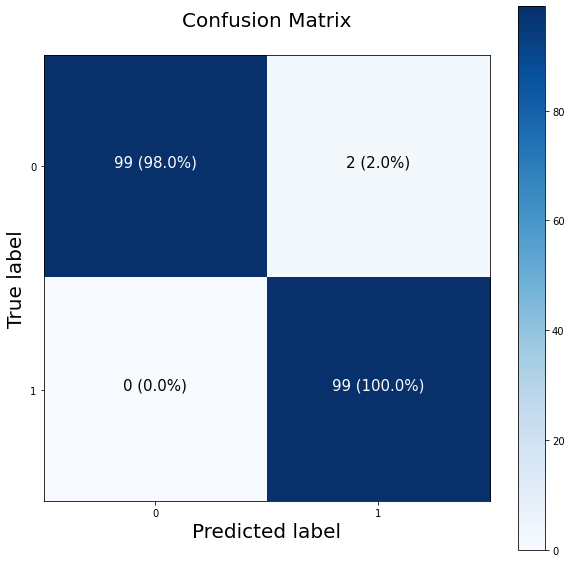

In [55]:
import itertools

figsize = (10, 10)

# confusion matrix oluşturma
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize etme
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues) 
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# eksenleri etiketleme
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# x ekseni etiketlerini en alta ayarla
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Etiket boyutunu ayarla
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Farklı renkler için eşik ayarla
threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

Bu çok daha iyi görünüyor. Görünüşe göre modelimiz, iki yanlış pozitif (sağ üst köşe) dışında test setinde neredeyse mükemmel tahminler yaptı.

## Daha Büyük Bir Örnekle Çalışma (Multi-Class Classification)

İkili bir sınıflandırma örneği gördük (bir veri noktasının kırmızı bir dairenin mi yoksa mavi bir dairenin mi parçası olduğunu tahmin ederek) ama ya birden fazla farklı nesne sınıfınız varsa?

Örneğin, bir moda şirketi olduğunuzu ve bir giysinin ayakkabı mı, gömlek mi yoksa ceket mi olduğunu tahmin etmek için bir sinir ağı kurmak istediğinizi varsayalım (3 farklı seçenek). Seçenek olarak ikiden fazla sınıfınız olduğunda, buna çok sınıflı sınıflandırma denir. İyi haber şu ki, şimdiye kadar öğrendiklerimiz (birkaç ince ayar ile) çok sınıflı sınıflandırma problemlerine de uygulanabilir.

In [56]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# verileri değişenlere atayalım
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [57]:
# İlk train örneğine göz atalım
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [58]:
# Verilerimizin şeklini kontrol edelim
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [59]:
# Tek bir örneğin şeklini kontrol edelim
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Tamam, her biri şekil (28, 28) ve bir etiket içeren 60.000 train örneğinin yanı sıra 10.000 şekil test örneği (28, 28) vardır.

Ama bunlar sadece rakamlar, hadi görselleştirelim.


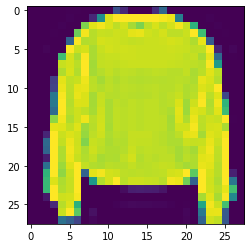

In [60]:
# Bir örneğe göz atalım hemen
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [61]:
# etiketini kontrol edelim
train_labels[7]

2

Görünüşe göre etiketlerimiz sayısal biçimde. Ve bu bir sinir ağı için iyi olsa da, onları insan tarafından okunabilir biçimde almak isteyebilirsiniz.

Sınıf adlarının küçük bir listesini oluşturalım (bunları veri kümesinin [`GitHub sayfasında`](https://github.com/zalandoresearch/fashion-mnist#labels) bulabiliriz).

🔑 Not: Bu veri kümesi bizim için hazırlanmış ve kullanıma hazır olsa da, birçok veri kümesinin bunun gibi kullanmaya hazır olmayacağını unutmamak önemlidir. Genellikle bir sinir ağıyla kullanıma hazır hale getirmek için birkaç ön işleme adımı yapmanız gerekir (daha sonra kendi verilerimizle çalışırken bunun daha fazlasını göreceğiz).

In [62]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Şimdi bunlara sahibiz, başka bir örnek çizelim.

> 🤔 Soru: Üzerinde çalıştığımız verilerin nasıl göründüğüne özellikle dikkat edin. Sadece düz çizgiler mi? Yoksa düz olmayan çizgileri de var mı? Giysilerin fotoğraflarında (aslında piksel koleksiyonları olan) desenler bulmak istesek, modelimizin doğrusal olmayanlara (düz olmayan çizgiler) ihtiyacı olacak mı, olmayacak mı?



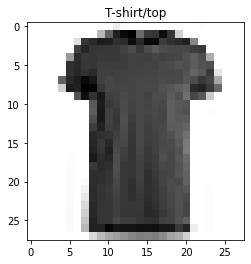

In [63]:
# Örnek bir resim ve etiketini görüntüleme
plt.imshow(train_data[17], cmap=plt.cm.binary) # renkleri siyah beyaz olarak değiştirme
plt.title(class_names[train_labels[17]]);

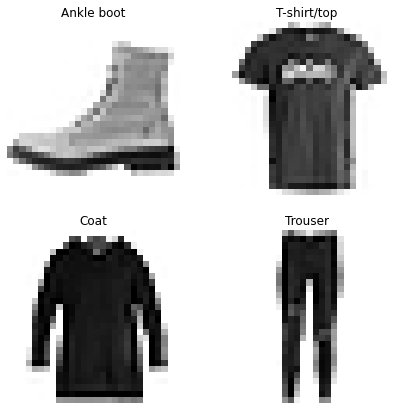

In [64]:
# Moda MNIST'in birden fazla rastgele görüntü
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Pekala, piksel değerleri ve etiketleri arasındaki ilişkiyi bulmak için bir model oluşturalım.

Bu çok sınıflı bir sınıflandırma problemi olduğundan, mimarimizde birkaç değişiklik yapmamız gerekecek (yukarıdaki Tablo 1 ile aynı hizada):

- Giriş şekli 28x28 tensörlerle (resimlerimizin yüksekliği ve genişliği) uğraşmak zorunda kalacak.
Aslında girdiyi (784) bir tensöre (vektöre) sıkıştıracağız.
Çıktı şeklinin 10 olması gerekecek çünkü modelimizin 10 farklı sınıf için tahmin yapmasına ihtiyacımız var.
- Ayrıca çıktı katmanımızın aktivasyon parametresini 'sigmoid' yerine "softmax" olarak değiştireceğiz. 
  - Göreceğimiz gibi, "softmax" etkinleştirme işlevi 0 ve 1 arasında bir dizi değer verir (çıktı şekliyle aynı şekil, toplamları ~1'e eşittir. En yüksek değere sahip indeks, model tarafından tahmin edilir.
- Kayıp fonksiyonumuzu ikili kayıp fonksiyonundan çok sınıflı kayıp fonksiyonuna değiştirmemiz gerekecek.
  - Daha spesifik olarak, etiketlerimiz tamsayı biçiminde olduğundan, etiketlerimiz one-hot encoding (örneğin, [0, 0, 1, 0, 0 gibi görünüyorlardı) tf.keras.losses.SparseCategoricalCrossentropy() kullanacağız. ..]), tf.keras.losses.CategoricalCrossentropy() kullanırdık.
- fit() işlevini çağırırken validation_data parametresini de kullanacağız. Bu bize eğitim sırasında modelin test setinde nasıl performans gösterdiği hakkında bir fikir verecektir.


In [65]:
tf.random.set_seed(42)

# bir model oluşturma
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# modeli derleme
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# modeli fit etme
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [66]:
# Modelimizin şekillerini kontrol edelim
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Pekala, modelimiz, ikili sınıflandırma problemimizde kullandığımıza benzer bir stil modeli kullanarak 10 epochtan sonra yaklaşık %35 doğruluğa ulaşıyor.

Hangisi tahmin etmekten daha iyidir (10 sınıfla tahmin etmek yaklaşık %10 doğrulukla sonuçlanır), ancak daha iyisini yapabiliriz.

0 ile 1 arasındaki sayıları tercih eden sinir ağlarından bahsettiğimizi hatırlıyor musunuz? (eğer hatırlamıyorsanız bunu bir hatırlatma olarak kabul edin)

Şu anda elimizdeki veriler 0 ile 1 arasında değil, başka bir deyişle, normalleştirilmedi (bu nedenle fit()'i çağırırken non_norm_history değişkenini kullandık). Piksel değerleri 0 ile 255 arasındadır.

In [67]:
# Eğitim verilerinin minimum ve maksimum değerlerini kontrol edin
train_data.min(), train_data.max()

(0, 255)

Bu değerleri 0 ile 1 arasında, tüm diziyi maksimuma bölerek elde edebiliriz: 0-255.

Bunu yapmak, tüm verilerimizin 0 ile 1 arasında olmasına neden olur (ölçeklendirme veya normalleştirme olarak bilinir).

In [68]:
# traini bölün ve görüntüleri maksimum değere göre test edin (normalleştirin)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Eğitim verilerinin minimum ve maksimum değerlerini kontrol edin
train_data.min(), train_data.max()

(0.0, 1.0)

Güzel! Şimdi verilerimiz 0 ile 1 arasında. Modellediğimiz zaman bakalım ne olacak. Daha önce olduğu gibi (model_11) aynı modeli kullanacağız, ancak bu sefer veriler normalize edilecek.

In [69]:
tf.random.set_seed(42)

# bir model oluşturma
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# modeli derleme
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# modeli fit etme
norm_history = model_12.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Vayy, daha önce olduğu gibi aynı modeli kullandık ama normalleştirilmiş verilerle artık çok daha yüksek bir doğruluk değeri görüyoruz!

Her modelin history değerlerini (kayıp eğrilerini) görselleştirelim.


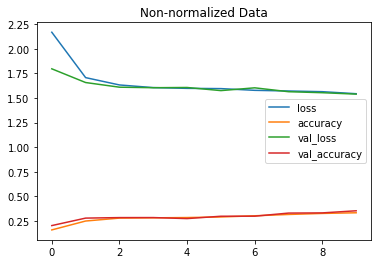

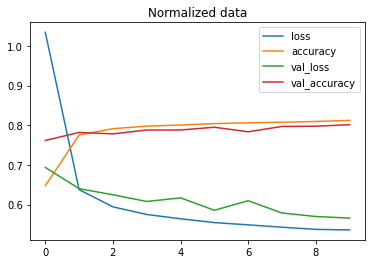

In [70]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data");

Vay. Bu iki grafikten, normalize verili modelimizin (model_12) normalleştirilmemiş verili modele (model_11) göre ne kadar hızlı geliştiğini görebiliriz.

> 🔑 Not: Biraz farklı verilere sahip aynı model, önemli ölçüde farklı sonuçlar üretebilir. Bu nedenle, modelleri karşılaştırırken, onları aynı kriterlere göre karşılaştırdığınızdan emin olmanız önemlidir (örneğin, aynı mimari ancak farklı veriler veya aynı veriler ancak farklı mimari). İdeal öğrenme oranını bulup ne olduğunu görmeye ne dersiniz? Kullanmakta olduğumuz mimarinin aynısını kullanacağız.

In [71]:
tf.random.set_seed(42)

# bir model oluşturma
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# modeli derleme
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# modeli fit etme
find_lr_history = model_13.fit(train_data,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data, test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

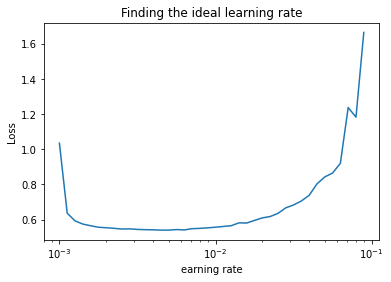

In [72]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("earning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Bu durumda, Adam optimizer'ın (0.001) varsayılan öğrenme oranına yakın bir yerde ideal öğrenme oranı gibi görünüyor.

İdeal öğrenme oranını kullanarak bir modeli yeniden yerleştirelim.


In [73]:
tf.random.set_seed(42)

# bir model oluşturma
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# modeli derleme
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# modeli fit etme
history = model_14.fit(train_data,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data, test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Şimdi ideale yakın bir öğrenme oranıyla eğitilmiş ve oldukça iyi performans gösteren bir modelimiz var, birkaç seçeneğimiz var.

Yapabiliriz:
- Diğer sınıflandırma ölçütlerini (karışıklık matrisi veya sınıflandırma raporu gibi) kullanarak performansını değerlendirin.
- Tahminlerinden bazılarını değerlendirin (görselleştirmeler aracılığıyla).
- Doğruluğunu artırın (daha uzun süre eğiterek veya mimariyi değiştirerek).
- Bir uygulamada kullanmak üzere kaydedin ve dışa aktarın.
İlk iki seçeneği inceleyelim.

İlk olarak, farklı sınıflardaki tahminlerini görselleştirmek için bir sınıflandırma matrisi oluşturacağız.

In [74]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 
  
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [75]:
# En son modelle tahminler yapın
y_probs = model_14.predict(test_data)
y_probs[:5]

array([[1.2742422e-09, 5.3467939e-08, 8.3849936e-06, 7.0589194e-06,
        9.7621414e-06, 5.4065306e-02, 7.2848763e-08, 6.3599236e-02,
        1.8366773e-03, 8.8047338e-01],
       [1.2383326e-05, 2.3110788e-17, 9.0172756e-01, 3.3549309e-06,
        5.8316510e-02, 1.4708356e-14, 3.9687403e-02, 3.2329574e-30,
        2.5285641e-04, 3.8686530e-21],
       [1.4126861e-04, 9.8552668e-01, 7.5693160e-06, 1.4010524e-02,
        2.0143854e-04, 9.7611138e-12, 1.0748472e-04, 4.0757726e-08,
        4.5021643e-06, 5.8545976e-07],
       [3.9738816e-06, 9.9383062e-01, 2.1684928e-06, 5.7096859e-03,
        2.5507511e-04, 4.3098709e-11, 1.8117787e-05, 1.1347497e-06,
        2.2362808e-06, 1.7706068e-04],
       [2.8454942e-01, 7.6419547e-06, 1.0144152e-01, 1.9927604e-02,
        3.2220736e-02, 1.3905409e-12, 5.6163126e-01, 1.6594300e-18,
        2.2172352e-04, 2.4364064e-15]], dtype=float32)

Modelimiz bir tahmin olasılıkları listesi verir, yani belirli bir sınıfın etiket olma olasılığının ne kadar muhtemel olduğuna dair bir sayı verir.

Tahmin olasılıkları listesindeki sayı ne kadar yüksekse, modelin doğru sınıf olduğuna inanması o kadar olasıdır.

En yüksek değeri bulmak için argmax() yöntemini kullanabiliriz.


In [76]:
# İlk örnek için öngörülen sınıf numarasına ve etiketine bakın
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [77]:
# Olasılıklardan tüm tahminleri etiketlere dönüştürün
y_preds = y_probs.argmax(axis=1)

# İlk 10 tahmin etiketini görüntüleyin
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Harika, şimdi modelimizin tahminlerini etiket biçiminde aldık, onları doğruluk etiketlerine karşı görmek için bir karışıklık matrisi oluşturalım.

In [78]:
# Güzelleştirilmemiş karışıklık matrisine göz atın
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[868,   5,  17,  60,   1,   0,  36,   0,  12,   1],
       [  3, 951,   4,  29,   5,   5,   3,   0,   0,   0],
       [ 50,   3, 667,  11, 158,   2,  97,   0,  12,   0],
       [ 86,  18,  11, 824,  20,   1,  27,   2,  11,   0],
       [  6,   1, 116,  48, 728,   3,  93,   0,   5,   0],
       [  0,   2,   0,   0,   0, 862,   0,  78,   9,  49],
       [263,   5, 155,  45, 123,   5, 390,   0,  14,   0],
       [  0,   0,   0,   0,   0,  21,   0, 924,   1,  54],
       [ 15,   1,  35,  16,   3,   4,   5,   5, 916,   0],
       [  0,   3,   0,   0,   1,   8,   0,  39,   3, 946]])

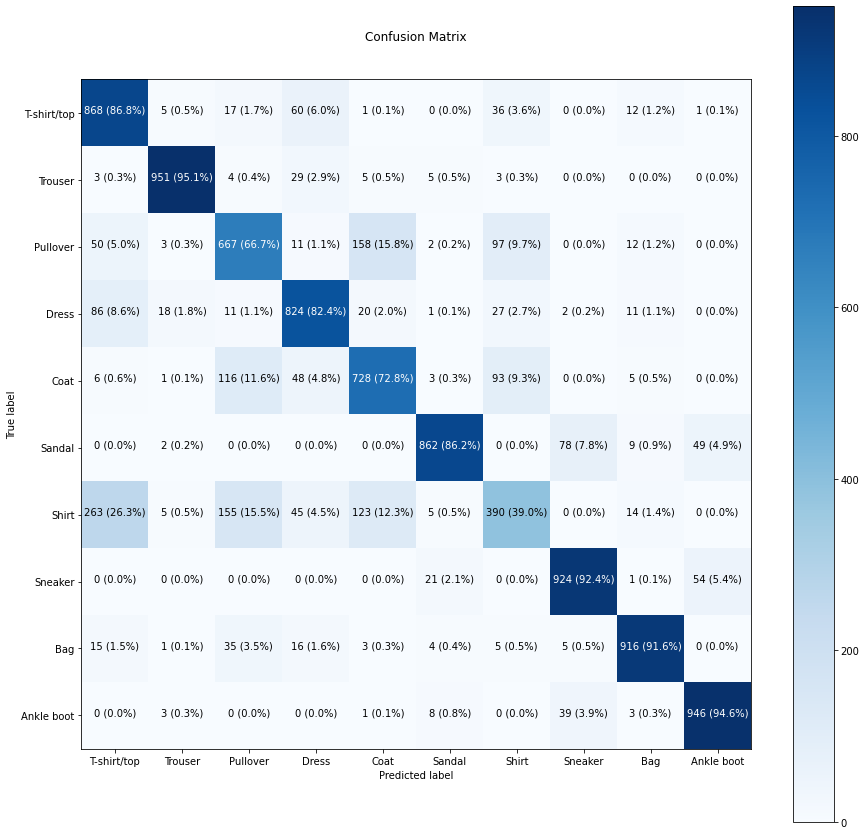

In [79]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Bu çok daha iyi görünüyor. Sonuçların o kadar iyi olmaması dışında... Görünüşe göre modelimizin Gömlek ve T-shirt/üst sınıflar arasında kafası karışıyor.

Bir karışıklık matrisi kullanarak model tahminlerimizin doğruluk etiketleriyle nasıl hizalandığını gördük, peki ya bazılarını görselleştirmeye ne dersiniz?

Tahmini ile birlikte rastgele bir görüntü çizmek için bir fonksiyon oluşturalım.

> 🔑 Not: Genellikle görüntülerle ve diğer görsel veri biçimleriyle çalışırken, verileri ve modelinizin çıktılarını daha iyi anlamak için mümkün olduğunca görselleştirmek iyi bir fikirdir.

In [80]:
 import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  
  # Tahminler ve hedefleri oluşturalım
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Hedef görüntüyü çizelim
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Tahminin doğru veya yanlış olmasına bağlı olarak başlıkların rengini değiştirelim
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[868,   5,  17,  60,   1,   0,  36,   0,  12,   1],
       [  3, 951,   4,  29,   5,   5,   3,   0,   0,   0],
       [ 50,   3, 667,  11, 158,   2,  97,   0,  12,   0],
       [ 86,  18,  11, 824,  20,   1,  27,   2,  11,   0],
       [  6,   1, 116,  48, 728,   3,  93,   0,   5,   0],
       [  0,   2,   0,   0,   0, 862,   0,  78,   9,  49],
       [263,   5, 155,  45, 123,   5, 390,   0,  14,   0],
       [  0,   0,   0,   0,   0,  21,   0, 924,   1,  54],
       [ 15,   1,  35,  16,   3,   4,   5,   5, 916,   0],
       [  0,   3,   0,   0,   1,   8,   0,  39,   3, 946]])

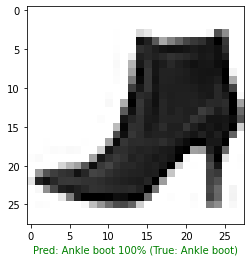

In [82]:
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

Yukarıdaki hücreyi birkaç kez çalıştırdıktan sonra, modelin tahminleri ile gerçek etiketler arasındaki ilişkiyi görsel olarak anlamaya başlayacaksınız.

Modelin hangi tahminlerde kafasının karıştığını anladınız mı?

Benzer sınıfları karıştırıyor gibi görünüyor, örneğin Sneaker with Ankle boot. Resimlere baktığınızda bunun nasıl olabileceğini görebilirsiniz. Bir Sneaker ve Ankle Boot'un genel şekli benzerdir. Genel şekil, modelin öğrendiği kalıplardan biri olabilir ve bu nedenle, iki görüntü benzer bir şekle sahip olduğunda, tahminleri karışır.


## Modelimiz Hangi Kalıpları Öğreniyor?

Bir sinir ağının sayılardaki kalıpları nasıl bulduğu hakkında çok konuştuk ama bu kalıplar tam olarak neye benziyor? Modellerimizden birini açıp öğrenelim.

İlk olarak, en son modelimizde (model_14) katmanlar özniteliğini kullanarak katmanların bir listesini alacağız.

In [83]:
# En son modelimizin katmanlarını bulun
model_14.layers

İndeksleme kullanarak bir hedef katmana erişebiliriz.

In [85]:
# Belirli bir katmanı görüntüleme
model_14.layers[1]

Ve `get_weights()` yöntemini kullanarak belirli bir katman tarafından öğrenilen kalıpları bulabiliriz.

`get_weights()` yöntemi, belirli bir katmanın ağırlıklarını (ağırlık matrisi olarak da bilinir) ve sapmalarını (önyargı vektörü olarak da bilinir) döndürür.


In [86]:
weights, biases = model_14.layers[1].get_weights()
weights, weights.shape

(array([[ 3.0885503 , -2.430857  ,  0.45438388, -3.0628507 ],
        [ 0.98286426, -2.71804   , -0.38760266, -1.1560956 ],
        [ 2.6185486 , -1.6931161 , -2.659585  , -2.343221  ],
        ...,
        [-0.5499583 ,  2.1220326 , -0.22042169,  0.75220233],
        [-0.5888785 ,  3.346401  ,  1.4520893 , -1.5131956 ],
        [ 0.90688974, -0.6245389 ,  0.64969605,  0.05348392]],
       dtype=float32), (784, 4))

Ağırlık matrisi, bizim durumumuzda 784 (28x28 piksel) olan giriş verileriyle aynı şekildedir. Ve seçilen katmandaki her nöron için ağırlık matrisinin bir kopyası var (seçilen katmanımızda 4 nöron var).

Ağırlık matrisindeki her değer, girdi verilerindeki belirli bir değerin ağın kararlarını nasıl etkilediğine karşılık gelir.

Bu değerler rastgele sayılar olarak başlar (bir katman oluştururken kernel_initializer parametresi tarafından ayarlanırlar, varsayılan "glorot_uniform"dur) ve daha sonra eğitim sırasında sinir ağı tarafından verilerin daha iyi temsili değerlerine (rastgele olmayan) güncellenir. 

In [87]:
biases, biases.shape

(array([ 2.1505804 ,  0.45967796, -0.38694024,  2.9040031 ], dtype=float32),
 (4,))

Her nöronun bir önyargı vektörü vardır. Bunların her biri bir ağırlık matrisi ile eşleştirilir. Önyargı değerleri varsayılan olarak sıfır olarak başlatılır (bias_initializer parametresi kullanılarak).

Önyargı vektörü, karşılık gelen ağırlık matrisindeki kalıpların bir sonraki katmanı ne kadar etkilemesi gerektiğini belirler.


In [88]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Şimdi birkaç derin öğrenme modeli oluşturduk, tüm girdiler ve çıktılar kavramının yalnızca bir modelin tamamıyla değil, bir model içindeki her katmanla da ilgili olduğunu belirtmenin tam zamanı.

Bunu zaten tahmin etmiş olabilirsiniz, ancak girdi katmanından başlayarak, sonraki her katmanın girdisi bir önceki katmanın çıktısıdır. Bunu `plot_model()` kullanarak açıkça görebiliriz.


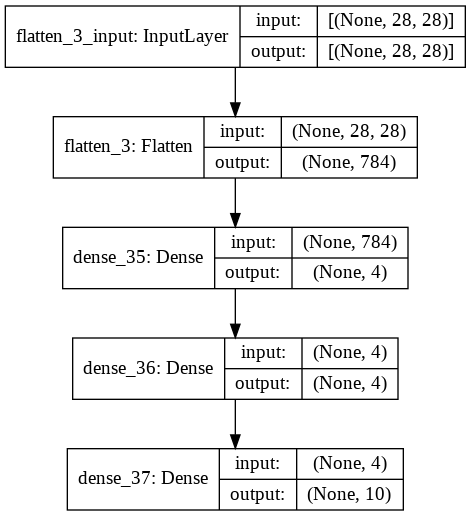

In [89]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

Bir model nasıl öğrenir (kısaca):

Pekala, bir sürü model eğittik ama kaputun altında neler olduğunu hiç tartışmadık. Peki bir model tam olarak nasıl öğrenir?

Bir model, ağırlık matrislerini ve yanlılık değerlerini her çağda güncelleyerek ve geliştirerek öğrenir (bizim durumumuzda, fit() işlevini çağırdığımızda).

Bunu, veriler ve etiketler arasında öğrendiği kalıpları gerçek etiketlerle karşılaştırarak yapar.

Mevcut modeller (ağırlık matrisleri ve yanlılık değerleri) kayıp fonksiyonunda istenen bir azalmaya neden olmazsa (daha yüksek kayıp daha kötü tahminler anlamına gelir), optimize edici modeli, modellerini doğru şekilde güncellemek için yönlendirmeye çalışır (gerçek kullanarak referans olarak etiketler).

Modelin tahminlerini geliştirmek için gerçek etiketleri referans olarak kullanma sürecine geri yayılım (backpropagation) denir. Başka bir deyişle, veriler ve etiketler bir modelden geçer (ileri geçiş) ve veriler ile etiketler arasındaki ilişkiyi öğrenmeye çalışır. Ve eğer bu öğrenilen ilişki gerçek ilişkiye yakın değilse veya geliştirilebilirse, model bunu kendi içinden geçerek (geriye geçiş) ve verileri daha iyi temsil etmek için ağırlık matrislerini ve önyargı değerlerini değiştirerek yapar.